# Mesh refinement study

## COMSOL files 01.MR.lam.001 - 003

- /Users/hkromer/02_PhD/02_Data/01_COMSOL/cfd/01.MR/01.MR.lam.001.mph

The objective is to find out if the temperature properties change with the mesh

- 2 mm FWHM spot
- 200 mm domain length
- 40 mm outer diameter of target
- 2 mm coolant channel
- 3 mm CuOFE layer
- 5 e-6 m Ti layer
- 3 l/min flow arte water
- 300 W beam power
- 200 rpm rotational speed
- 20 degC water inlet temperature
- laminar flow

<img src="001.MR.lam.001.meshplot.png" style="width: 10%">
<img src="001.MR.lam.002.meshplot.png" style="width: 10%">
<img src="001.MR.lam.003.meshplot.png" style="width: 10%">

In [39]:
import numpy as np
import os
import re
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from scipy import interpolate

In [49]:
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2018/bin/x86_64-darwin'
plt.rc('text', usetex=True)
plt.rc('font', weight='bold')
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.tt'] = 'Arial'
matplotlib.rcParams['mathtext.cal'] = 'Arial'
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

In [8]:
folder = '/Users/hkromer/02_PhD/02_Data/01_COMSOL/cfd/01.MR/DataAlongZatBeamspot/' 

In [9]:
files = [s for s in os.listdir(folder) if s.endswith('csv')]

In [86]:
lst_df = []
for file in files:
    df = pd.read_csv(f'{folder}/{file}', skiprows=8)
    df.columns = ['x', 'y', 'z', 'T', 'U']   # x in mm, y in mm, z in mm, T in K, U in m/s
    df['T_degC'] = df['T'] - 273.15
    run = re.findall(r'lam\.(\d\d\d)\.', file)[0]
    df['run'] = run
    if run == '001':
        df['mesh_cat'] = 'A'
        df['mesh_cat'] = df['mesh_cat'].astype('category')
    if run == '002':
        df['mesh_cat'] = 'B'
        df['mesh_cat'] = df['mesh_cat'].astype('category')
    if run == '003':
        df['mesh_cat'] = 'C'
        df['mesh_cat'] = df['mesh_cat'].astype('category')
    lst_df.append(df)
    
df_all = pd.concat(lst_df)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 37
Data columns (total 8 columns):
x           105 non-null float64
y           105 non-null int64
z           105 non-null float64
T           105 non-null float64
U           73 non-null float64
T_degC      105 non-null float64
run         105 non-null object
mesh_cat    105 non-null object
dtypes: float64(5), int64(1), object(2)
memory usage: 7.4+ KB


In [87]:
# reference dataframe is the 003, most finest mesh
ref_df = df_all[ df_all['run'] == '003' ]
df_comp = df_all[ df_all['run'] != '003' ]

In [88]:
# sanity check
print(len(df_all))
print(len(df_comp))
print(len(ref_df))

105
60
45


## Relative difference in temperature

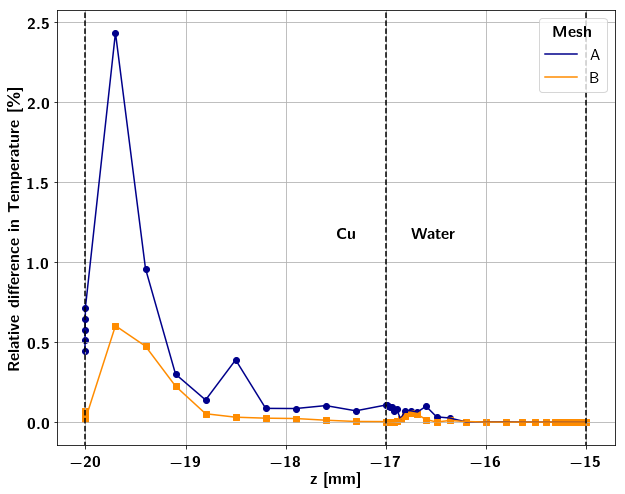

(-0.14224992714715037, 2.5749225572293226)


In [90]:
runs = df_comp['run'].unique()
mesh_cats = df_comp['mesh_cat'].unique()
ref_df = ref_df.sort_values(by=['z'])
z0 = ref_df['z'].values  # mesh points of the finest mesh
T0 = ref_df['T'].values  # T of the finest mesh

colors = ['darkblue', 'darkorange']
markers = ['o', 's']
fs = 16
ls = 16

plt.figure(figsize=(10,8))
for r, c, m, lbl  in zip(runs, colors, markers, mesh_cats):
    this_df = df_comp[ df_comp['run'] == r ]
    this_df = this_df.sort_values(by=['z'])
    # interpolate the T
    interpT = interpolate.interp1d(this_df['z'].values, this_df['T'].values, fill_value='extrapolate')
    
    # extract T at the positions of the finest mesh
    T = interpT(z0)
    
    # calculate difference in T 
    rel_diff_T = 100.0*np.abs(T-T0)/T0
    
    # plot
    plt.plot(z0, rel_diff_T, c=c, label=f'{lbl}')
    plt.scatter(z0, rel_diff_T, c=c, marker=m)

ax = plt.gca()
ylim = ax.get_ylim()
plt.plot([-17, -17], [-10, 10], color='black', linestyle='--')
plt.plot([-20, -20], [-10, 10], color='black', linestyle='--')
plt.plot([-15, -15], [-10, 10], color='black', linestyle='--')
plt.ylim(ylim)
ax.tick_params(axis = 'both', which = 'major', labelsize = ls)
ax.text(-17.5, 1.15, r'\textbf{Cu}', color='black', fontsize=fs)
ax.text(-16.75, 1.15, r'\textbf{Water}', color='black', fontsize=fs)
plt.grid()
plt.xlabel(r'\textbf{z [mm]}', fontsize=fs)
plt.ylabel(r'\textbf{Relative difference in Temperature [\%]}', fontsize=fs)
legend = plt.legend(title=r'\textbf{Mesh}', fontsize=fs, loc='upper right')
plt.setp(legend.get_title(),fontsize=fs)
# plt.title('Mesh refinement')
plt.savefig(f'{folder}/mesh_refinement_T.png', dpi=600)
plt.savefig(f'{folder}/mesh_refinement_T.pdf', dpi=600)
plt.show()
print(ylim)

## Relative difference in velocity magnitude


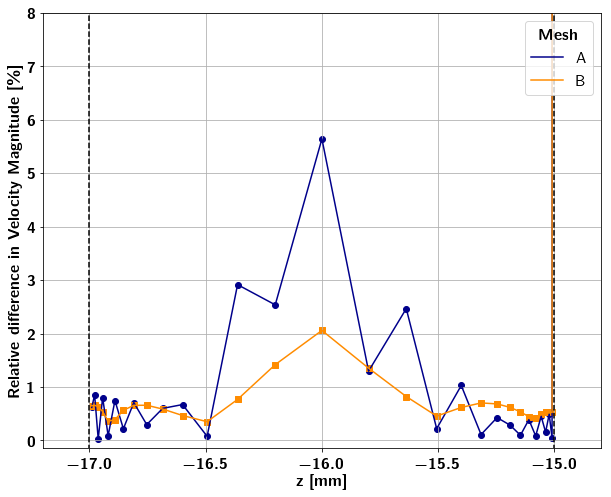

In [91]:
runs = df_comp['run'].unique()
mesh_cats = df_comp['mesh_cat'].unique()
ref_df = ref_df.sort_values(by=['z'])
z0 = ref_df['z'].values  # mesh points of the finest mesh
U0 = ref_df['U'].values  # T of the finest mesh

colors = ['darkblue', 'darkorange']
markers = ['o', 's']
fs = 16
ls = 16

plt.figure(figsize=(10,8))
for r, c, m, lbl  in zip(runs, colors, markers, mesh_cats):
    this_df = df_comp[ df_comp['run'] == r ]
    this_df = this_df.sort_values(by=['z'])
    # interpolate the T
    interpU = interpolate.interp1d(this_df['z'].values, this_df['U'].values, fill_value='extrapolate')
    
    # extract U at the positions of the finest mesh
    U = interpU(z0)
    
    # calculate difference in U 
    rel_diff_U = 100.0*np.abs(U-U0)/U0
    
    # plot
    plt.plot(z0, rel_diff_U, c=c, label=f'{lbl}')
    plt.scatter(z0, rel_diff_U, c=c, marker=m)

ax = plt.gca()
ylim = ax.get_ylim()
plt.plot([-17, -17], [-10, 10], color='black', linestyle='--')
plt.plot([-20, -20], [-10, 10], color='black', linestyle='--')
plt.plot([-15, -15], [-10, 10], color='black', linestyle='--')
plt.ylim(-0.14, 8)
plt.xlim(-17.2, -14.8)
ax.tick_params(axis = 'both', which = 'major', labelsize = ls)

plt.grid()
plt.xlabel(r'\textbf{z [mm]}', fontsize=fs)
plt.ylabel(r'\textbf{Relative difference in Velocity Magnitude [\%]}', fontsize=fs)
legend = plt.legend(title=r'\textbf{Mesh}', fontsize=fs, loc='upper right')
plt.setp(legend.get_title(),fontsize=fs)
# plt.title('Mesh refinement')
plt.savefig(f'{folder}/mesh_refinement_U.png', dpi=600)
plt.savefig(f'{folder}/mesh_refinement_U.pdf', dpi=600)
plt.show()